<a href="https://colab.research.google.com/github/TianXie1999/Deep-Learning-in-OR-FE/blob/main/Multiclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from sklearn.datasets import make_multilabel_classification
from sklearn.preprocessing import MultiLabelBinarizer
X, Y = make_multilabel_classification(n_samples=5, random_state=0,return_indicator = False)
Y

[[2, 3, 4], [2], [0, 1, 3], [0, 1, 2, 3, 4], [0, 1, 2]]

In [2]:
MultiLabelBinarizer().fit_transform(Y)

array([[0, 0, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 0]])

### Example of using 1 vs all classifier

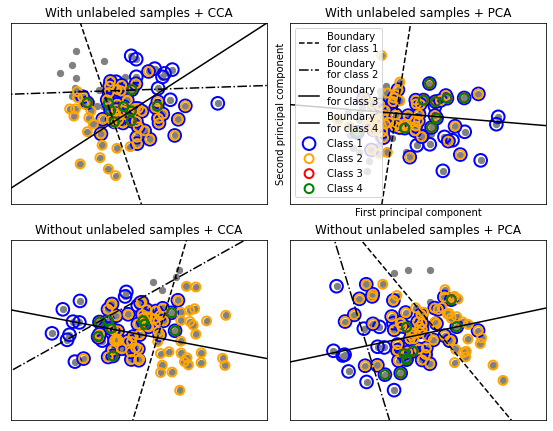

In [12]:
import numpy as np
import matplotlib.pylab as pl

from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA


def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    # domain of x 
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    pl.plot(xx, yy, linestyle, label=label)


def plot_subfigure(X, Y, subplot, title, transform):
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError

    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel='linear'))
    classif.fit(X, Y)

    pl.subplot(2, 2, subplot)
    pl.title(title)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    two_class = np.where(Y[:, 2])
    three_class = np.where(Y[:, 3])

    pl.scatter(X[:, 0], X[:, 1], s=40, c='gray')
    pl.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
               facecolors='none', linewidths=2, label='Class 1')
    pl.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
               facecolors='none', linewidths=2, label='Class 2')
    pl.scatter(X[two_class, 0], X[two_class, 1], s=80, edgecolors='red',
               facecolors='none', linewidths=2, label='Class 3')
    pl.scatter(X[two_class, 0], X[two_class, 1], s=80, edgecolors='green',
               facecolors='none', linewidths=2, label='Class 4')
    
    plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
                    'Boundary\nfor class 1')
    plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
                    'Boundary\nfor class 2')
    plot_hyperplane(classif.estimators_[2], min_x, max_x, 'k-',
                    'Boundary\nfor class 3')
    plot_hyperplane(classif.estimators_[3], min_x, max_x, 'k',
                    'Boundary\nfor class 4')
    pl.xticks(())
    pl.yticks(())

    pl.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
    pl.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
    if subplot == 2:
        pl.xlabel('First principal component')
        pl.ylabel('Second principal component')
        pl.legend(loc="upper left")


pl.figure(figsize=(8, 6))

X, Y = make_multilabel_classification(n_classes=4, n_labels=2,
                                      allow_unlabeled=True,
                                      return_indicator=True,
                                      random_state=1)

plot_subfigure(X, Y, 1, "With unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 2, "With unlabeled samples + PCA", "pca")

X, Y = make_multilabel_classification(n_classes=4, n_labels=2,
                                      allow_unlabeled=False,
                                      return_indicator=True,
                                      random_state=1)

plot_subfigure(X, Y, 3, "Without unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 4, "Without unlabeled samples + PCA", "pca")

pl.subplots_adjust(.04, .02, .97, .94, .09, .2)
pl.show()

In [39]:
classif = OneVsRestClassifier(SVC(kernel='linear'))
classif.fit(X, Y)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='linear', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [40]:
A = classif.score(X,Y)

In [41]:
A

0.83

### Using GridSearchCV

In [47]:
from sklearn.model_selection import GridSearchCV
parameters = {
    "estimator__C": [1,2,3,4,5,6,7,8],
    "estimator__kernel": ["linear","poly","rbf"],
    "estimator__degree": [1, 2, 3, 4]
}
model_to_set = OneVsRestClassifier(SVC())
model_tunning = GridSearchCV(model_to_set, param_grid=parameters, scoring = 'accuracy')

model_tunning.fit(X, Y)

print(model_tunning.best_score_)
print(model_tunning.best_params_)

0.5999999999999999
{'estimator__C': 7, 'estimator__degree': 1, 'estimator__kernel': 'rbf'}
